In [1]:
import pandas as pd                  #Importing Pandas library
import numpy as np                   #Importing numpy library
import matplotlib.pyplot as plt      # Impoert matplotlib library

In [2]:
project=pd.read_excel('Project11.xls') #Reading dataset

In [3]:
project.columns #Looking at column names

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [4]:
project.shape #Dimension of Original Dataset

(740, 21)

# Checking for missing Values

In [5]:
#Below code was found from here : https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251.
#This function was created by Nikos Tavoularis and shared on stackoverflow.com. Comments in below functions were added by Smit Patel

def missing_values_table(df):
        mis_val = df.isnull().sum()                                #Counts the number of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)        #Calculates the precentage of missing valyes
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)  #Concates the above variables
        mis_val_table_ren_columns = mis_val_table.rename(              #renames the column
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[              # Sort and round the values the column in ascending order
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(         
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")                     
        return mis_val_table_ren_columns                                     #Displayes and returns the result

In [6]:
missing_values_table(project)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Column Subsetting, Renaming and Dropping

In [7]:
new_project=project.loc[ : , ['ID','Age', 'Body mass index','Social drinker',
       'Social smoker','Son','Day of the week','Month of absence','Seasons','Service time','Absenteeism time in hours'] ] #Subsetting columns of interest

In [8]:
new_project.columns=['ID','Age', 'BMI', 'Social_drinker', 'Social_smoker', 'Son',
       'Day_of_the_week', 'Month_of_absence', 'Seasons', 'Service_time','Absenteeism_time_in_hours'] #Renaming column  names

In [9]:
new_project.drop(new_project[new_project.Absenteeism_time_in_hours==0].index,inplace=True) #Dropping data that contains 0 hours in absenteeism_time_in_hours columns

In [10]:
new_project.shape #Dimension of the dataset after cleaning and subsetting columns of interest

(696, 11)

# DataSet Distribution

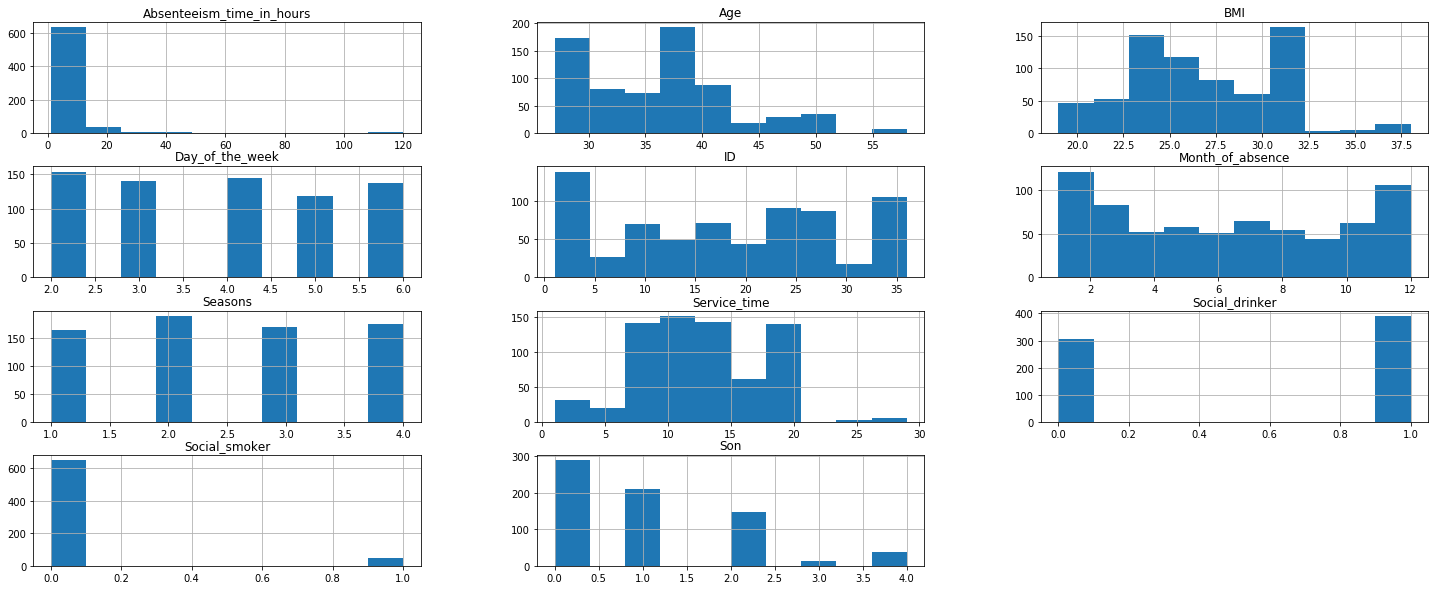

In [11]:
plt.rcParams['figure.figsize']=25,10               #Selecting size and width of the plot
new_project.hist()                                 #Choosing bar/histogram for visualization
plt.show()                                         #Display the visualization

In [12]:
new_project1=new_project #Copying dataframe into new dataframe. To avoid messing with original dataframe

# Result Analysis:
Original dataset contained 740 observations and 21 variables. After subsetting and dropping few columns. Dataset size was lowered to 696 Observations and 11 variables. To avoid deletion any useful data in original dataset, subsetted dataset was copied into new dataframe.

# Business Question 1: Which age group misses the most work? 

# Binning Age Column

In [13]:
#Calculation in this section is suggested by Lauren Foltz using Excel, However Coding in below section was developed and executed by Smit Patel
bins = [20,29,39,49,59]   #Creating bins
labels=['Adult20s','Adult30s','Adult40s','Adult50s'] #Labelling bins

In [14]:
new_project1['age_fact']=pd.cut(new_project1['Age'],bins=bins,labels=labels) #Creating new column with bins that are appropriate for each rows

In [15]:
import warnings                   #Import warnings library
warnings.filterwarnings('ignore')

In [16]:
hours_sum=new_project1.groupby(('ID','age_fact'),as_index=False)['Absenteeism_time_in_hours'].sum() #Sum number of hours missed by employees based on Unique ID and labeled bins

In [17]:
hours_sum=hours_sum.dropna() #Removing NA's that are generated during the process

In [18]:
age_hours_missed=round(hours_sum.groupby('age_fact')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by emplyees based on Age group and rounding to two decimals

In [19]:
age_hours_missed #Avg hours missed by employees based on Unique ID.

,Absenteeism_time_in_hours
age_fact,
Adult20s,141.80
Adult30s,190.33
Adult40s,97.10
Adult50s,196.33


# Result Analysis:

Adult in their 50's misses most work followed by Adult's in their 30s.

# Business Question 2 : Which BMI group the misses most work? 

In [20]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
bin2=[19,24,29,38]          #Binning BMI 
labels2=['Normal','Overweight','Obese'] #labelling BMI's

In [21]:
new_project1['BMI_fact']=pd.cut(new_project1['BMI'],bins=bin2,labels=labels2) #Creating new column to represent BMI value assocaited with bins and labels

In [22]:
BMI_sum=new_project1.groupby(('ID','BMI_fact'),as_index=False)['Absenteeism_time_in_hours'].sum() #Sum number of hours missed by employees based on Unique ID and labeled bins

In [23]:
BMI_sum=BMI_sum.dropna() #Removing NA's that are generated during the process

In [24]:
BMI_hours_missed=round(BMI_sum.groupby('BMI_fact')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by emplyees based on BMI group and rounding to two decimals

In [25]:
BMI_hours_missed #Avg hours missed by employees based on Unique ID.

,Absenteeism_time_in_hours
BMI_fact,
Normal,123.25
Overweight,148.54
Obese,208.71


# Result Analysis:
Obese people misses more work compare to Normal and Overweight. The next BMI group that misses more work is NOT shockingly employees in Overweight BMI group.

    BMI Group     Labels
    19-24         Normal
    25-29         Overweight
    Above 30      Obese

# Part #1 :Do Drinkers or Non-Drinkers miss the most work?

In [26]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
new_project1['Drinker_cat']=pd.cut(new_project1.Social_drinker,2,labels=['Drinker','Non-Drinker']) #Creating new column and assigning lables based on values present in Social_drinker column

In [27]:
Drinker_sum=new_project1.groupby(('ID','Drinker_cat'),as_index=False)['Absenteeism_time_in_hours'].sum() #Sum number of hours missed by employees based on Unique ID and labeled bins

In [28]:
Drinker_sum=Drinker_sum.dropna() #Removing NA's that are generated durig the process

In [29]:
Drinker_hours_missed=round(Drinker_sum.groupby('Drinker_cat')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by emplyees based on Drinker's group and rounding to two decimals

In [30]:
Drinker_hours_missed #Avg hours missed by employees based on Unique ID.

,Absenteeism_time_in_hours
Drinker_cat,
Drinker,118.62
Non-Drinker,189.76


# Result Analysis:
Non-Drinker employees misses more work compare to Drinker.

# Part #2 : Do Smokers or Non-Smokers miss the most work?

In [31]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
new_project1['Smoker_cat']=pd.cut(new_project1.Social_smoker,2,labels=['Smoker','Non-Smoker']) #Creating new column and assigning lables based on values present in Social_smoker column

In [32]:
Smoker_sum=new_project1.groupby(('ID','Smoker_cat'),as_index=False)['Absenteeism_time_in_hours'].sum() #Sum number of hours missed by employees based on Unique ID and labeled bins

In [33]:
Smoker_sum=Smoker_sum.dropna() #Removing NA's that are generated durig the process

In [34]:
Smoker_hours_missed=round(Smoker_sum.groupby('Smoker_cat')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by employees based on Smoker's group and rounding to 2 decimals

In [35]:
Smoker_hours_missed #Avg hours missed by employees based on Unique ID.

,Absenteeism_time_in_hours
Smoker_cat,
Smoker,183.58
Non-Smoker,50.14


# Result Analysis:

Non-Drinker misses more work compare to Drinker. Smoker misses more work compare to Non-smoker.

# Business Question# 3 : Do people with children miss more than people without?

In [36]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
bin3=[-np.inf,0,np.inf] #Creting bins for 0-4 levels in "son" column

In [37]:
new_project1['son_fact']=pd.cut(new_project1.Son,bins=bin3,labels=['None','some']) #Creating new column and assigning lables based on values present in 'Son' column

In [38]:
Son_sum=new_project1.groupby(('ID','son_fact'),as_index=False)['Absenteeism_time_in_hours'].sum() #Sum number of hours missed by employees based on Unique ID and labeled bins

In [39]:
Son_sum=Son_sum.dropna() #Removing NA's that are generated durig the process

In [40]:
Son_hours_missed=round(Son_sum.groupby('son_fact')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by employees based on Son's group and rounding to 2 decimals

In [41]:
Son_hours_missed

,Absenteeism_time_in_hours
son_fact,
None,133.75
some,167.57


# Result Analysis:
Employess with 1 or more children misses more work compare to employees with no children

# Business Question #4: Which day of the week is missed most? Which month? Which season?

# Part # 1 : Which Day of the week missed most ?

In [42]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
from calendar import day_name     #Import days of the week library
from collections import deque

In [43]:
days = deque(day_name)          #Dequing days of the week 

In [44]:
days.rotate(2)                    # rotate days
days_map = dict(enumerate(days)) #Creating dictionary

In [45]:
new_project4=new_project1 #Copying dataset into new datafram to avoid overwriting

In [46]:
new_project4['Day_Factor'] = new_project4['Day_of_the_week'].map(days_map) #Mapping days of the week to a dataframe

In [47]:
Day_filter=new_project4.filter(['Day_Factor','Absenteeism_time_in_hours']) #Filtering columns of interest

In [48]:
Day_filter.groupby('Day_Factor').sum()[['Absenteeism_time_in_hours']].sort_values(['Absenteeism_time_in_hours'],ascending=False) #Grouping by Days of the week, summing and Sorting hours in descending order

,Absenteeism_time_in_hours
Day_Factor,
Monday,1489
Tuesday,1229
Wednesday,1115
Friday,738
Thursday,553


# Result Analysis:
Employees are mostly absent on Monday, Tuesday and Wednesday.

# Part #2 :Which Month is missed by employees ?

In [49]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
month_filter=new_project1.filter(['Month_of_absence','Absenteeism_time_in_hours']) #Filtering columns of interest

In [50]:
month_group=month_filter.groupby(['Month_of_absence']).sum()[['Absenteeism_time_in_hours']] #Grouping and summing hours missed by employees

In [51]:
month_group #Output of Month and total hours missed by employees for each month

,Absenteeism_time_in_hours
Month_of_absence,
1,222
2,294
3,765
4,482
5,400
6,411
7,734
8,288
9,292


# Part #3 :Which Season is missed by employees?

In [52]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
new_project4['seasons_fact']=pd.cut(new_project4.Seasons,4,labels=['Summer','Autumn','Winter','Spring']) #Adding dummy column to covnert numerical data to categorical

In [53]:
season_filter=new_project4.filter(['seasons_fact','Absenteeism_time_in_hours']) #Filtering columns of interest

In [54]:
seasons_group=season_filter.groupby(['seasons_fact']).sum()[['Absenteeism_time_in_hours']] #Grouping by Seasons and adding number of hours missed by employees

In [55]:
seasons_group #Output of Seasons and number of hours missed by employees

,Absenteeism_time_in_hours
seasons_fact,
Summer,1241
Autumn,1152
Winter,1492
Spring,1239


# Result Analysis:
Most employees are absent in March and July,which are Summer and winter seasons in Brazil. This data correlates with the above season output.

Season breakdown in Brazil (http://trip-n-travel.com/listicle/21049/)

    Month            Seasons
    Jan- March	      Summer
    April- June	      Autumn
    July- Sept        Winter
    Oct- Dec	      Spring


---------------------------------------------------------------------------------------------------------------------------

# Visualizations:

In [56]:
import altair as alt                  #Importing Altair Library
alt.renderers.enable('notebook')      #Rendering notebook

RendererRegistry.enable('notebook')

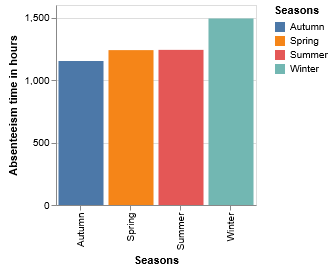

In [57]:
alt.Chart(new_project4).mark_bar().encode(                                                     #Selecting Bar chart for visualization
    alt.X('seasons_fact:N',axis=alt.Axis(title='Seasons')),                                    #Assigning data to x-axis and adding title
    alt.Y('sum(Absenteeism_time_in_hours):Q',axis=alt.Axis(title='Absenteeism time in hours')), #Assigning data to Y-axis and adding title
    color=alt.Color('seasons_fact:N',title='Seasons')                                           #Assigning color to visualization and adding title
).properties(width=200,height=200)                                                              #Assigning height and width of the plot

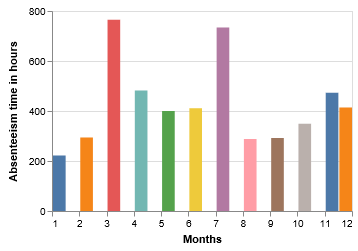

In [58]:
alt.Chart(new_project1).mark_bar().encode(                                                         #Selecting Bar chart for visualization
    alt.X('Month_of_absence:Q',axis=alt.Axis(title='Months',ticks=True),bin=alt.Bin(maxbins=30)),  #Assigning data to x-axis, adding title and adding maximum number of bins to x-axis
    alt.Y('sum(Absenteeism_time_in_hours):Q',axis=alt.Axis(title='Absenteeism time in hours')),    #Assigning data to Y-axis and adding title
    color=alt.Color('Month_of_absence:N',legend=None)                                              #Assigning color to visualization and adding title
).properties(width=300,height=200)                                                                 #Assigning height and width of the plot

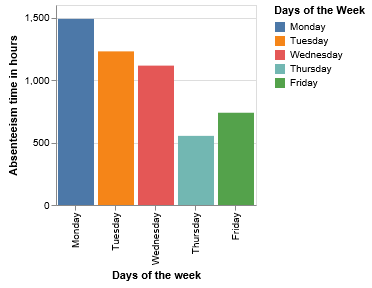

In [59]:
alt.Chart(new_project4).mark_bar().encode(                                                                                    #Selecting Bar chart for visualization
    alt.X('Day_Factor:N',axis=alt.Axis(title='Days of the week'),sort=['Monday','Tuesday','Wednesday','Thursday','Friday']),  #Assigning data to x-axis, adding title and sorting by Days of the week
    alt.Y('sum(Absenteeism_time_in_hours):Q',axis=alt.Axis(title='Absenteeism time in hours')),                               #Assigning data to Y-axis and adding title
    color=alt.Color('Day_Factor:N',title='Days of the Week',sort=['Monday','Tuesday','Wednesday','Thursday','Friday'])      #Assigning color to visualization, adding title and sorting by Days of the week
).properties(width=200,height=200)                                                                                          #Assigning height and width of the plot